In [1]:
import scanpy as sc
import scvi
from matplotlib import rcParams
import matplotlib.pyplot as plt

folder_path = "C:/Users/heung/OneDrive/Documents/scData/16. Siglec-9_GSE235913/concat/"

# Load data

In [2]:
adata = sc.read(folder_path + 'adata_annotated.h5ad')

In [2]:
# Read in the data
adata = sc.read(folder_path + "adata_scVI.h5ad")
# model = scvi.model.SCVI.load(folder_path + "model/", adata)

c:\Users\heung\anaconda3\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:429: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
c:\Users\heung\anaconda3\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:431: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
c:\Users\heung\anaconda3\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:434: PerformanceWarning: DataFrame is highly fragmented.  This is usually t

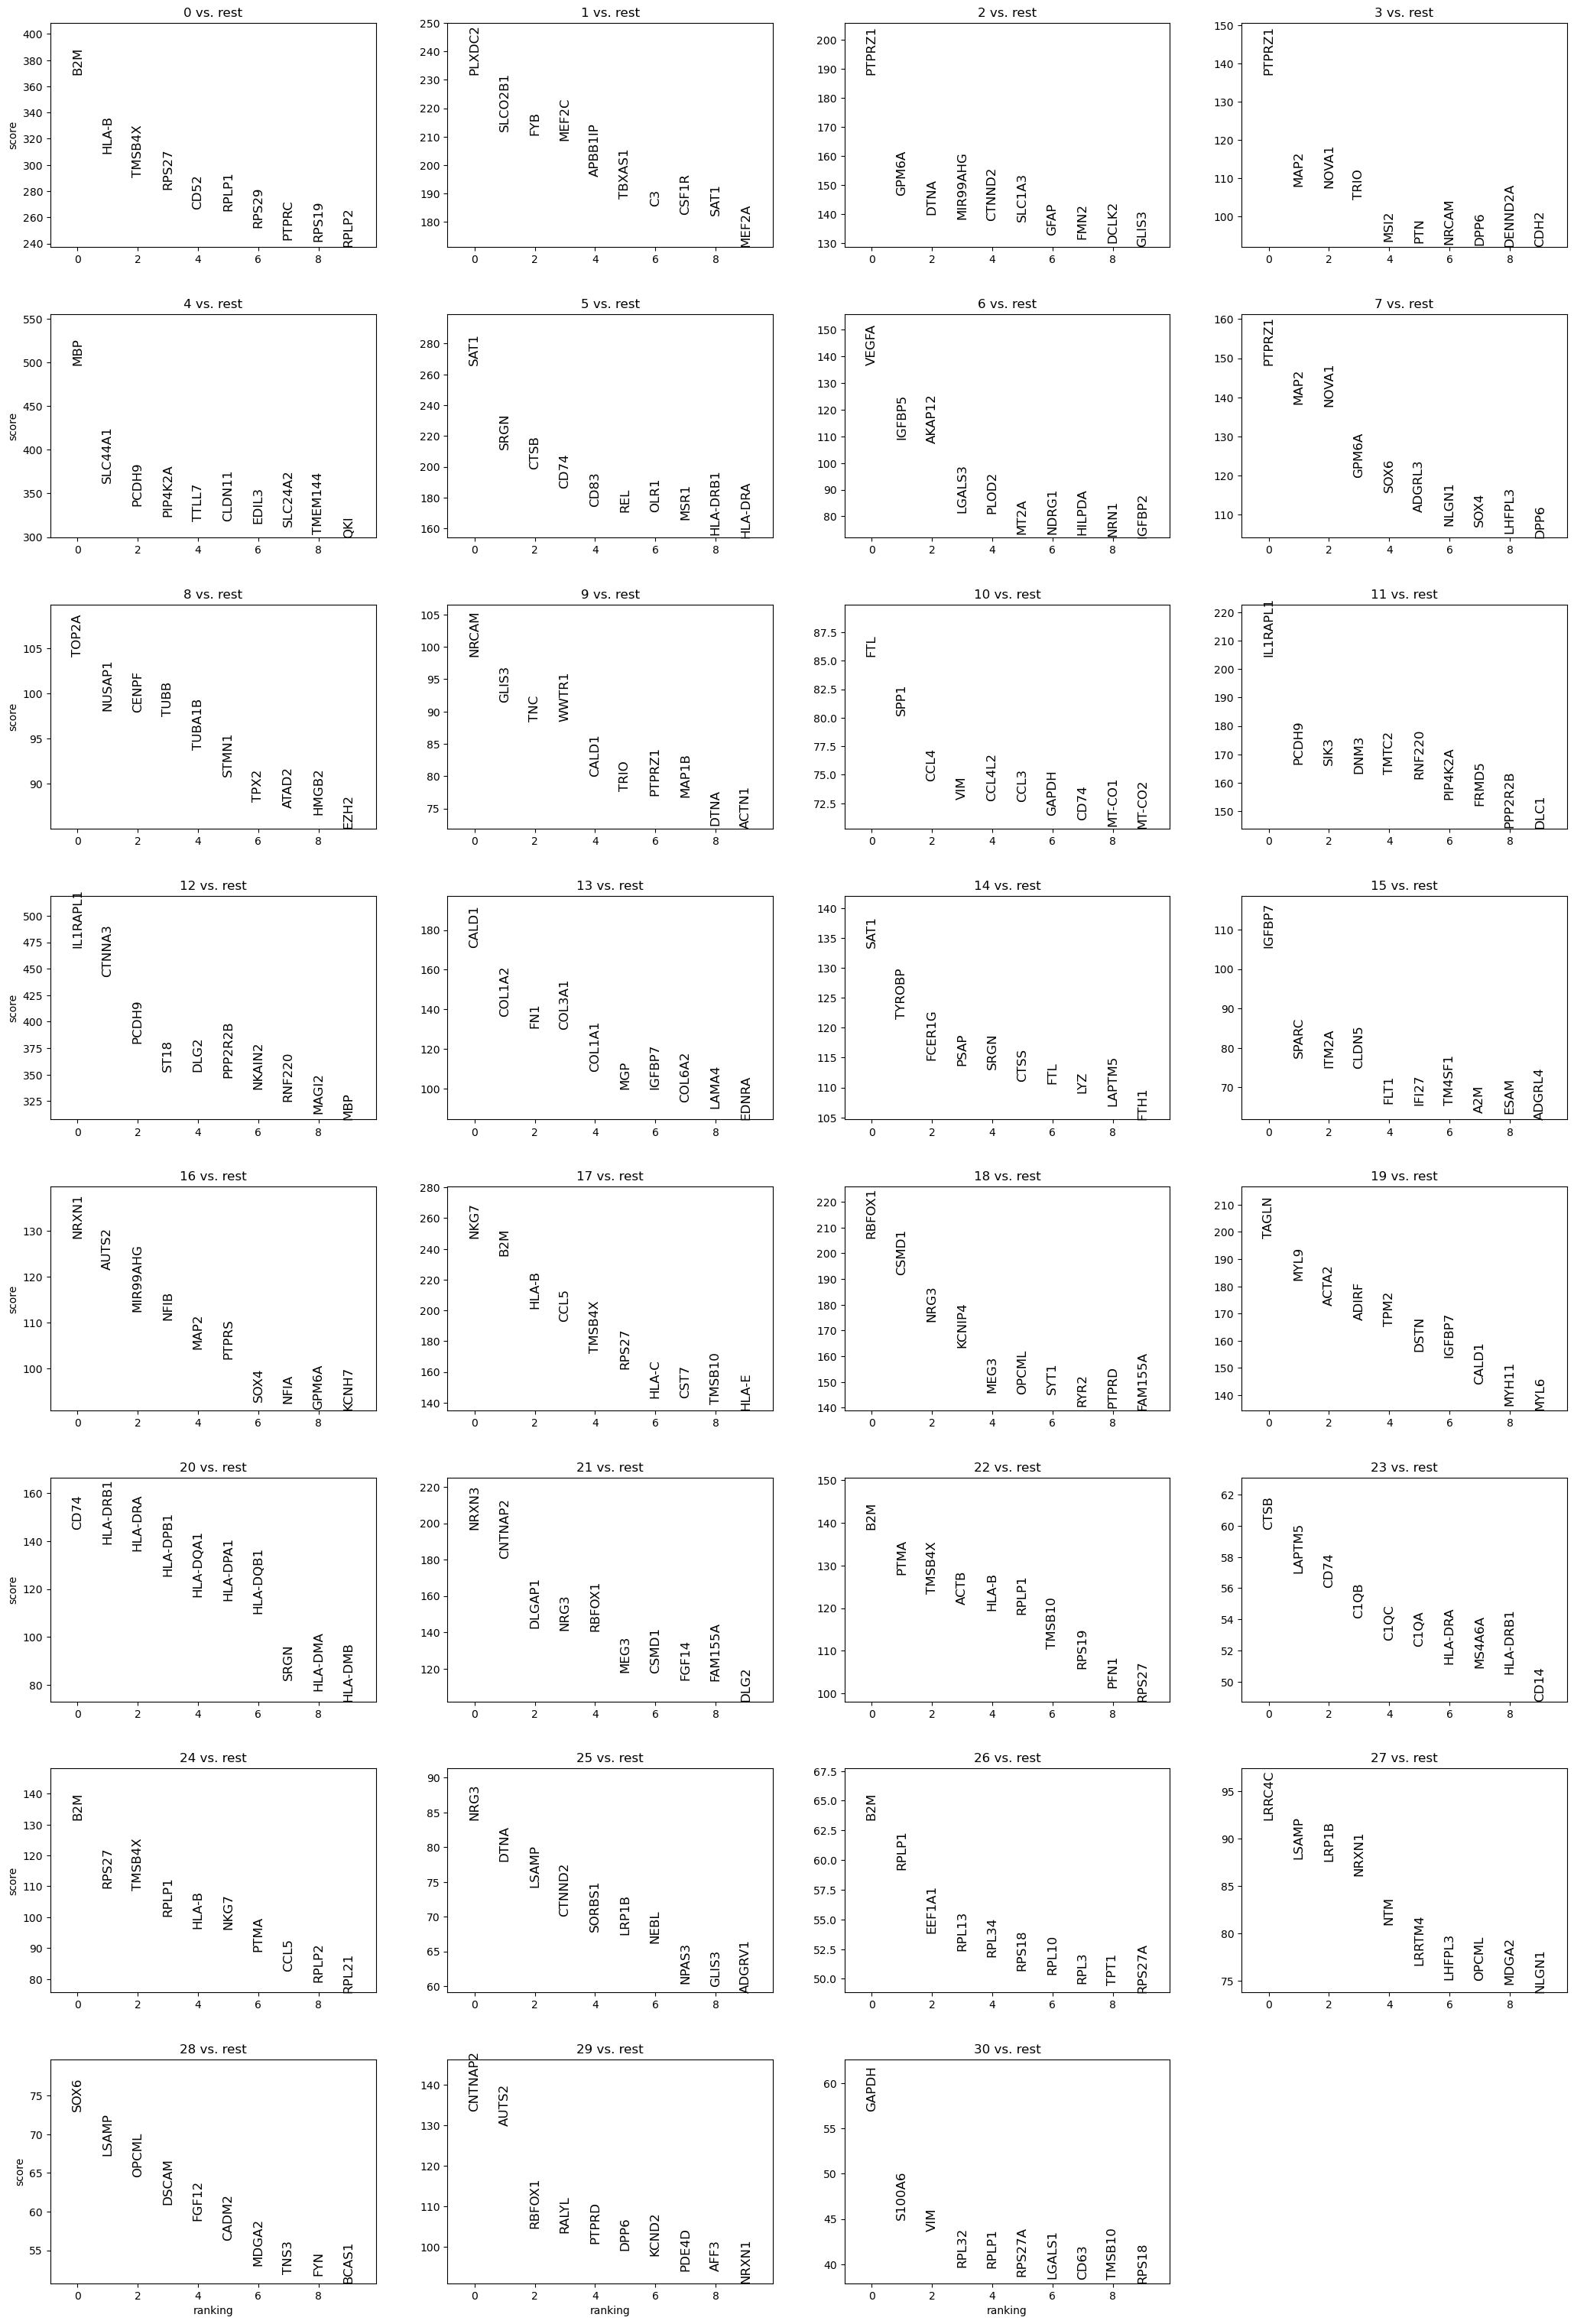

In [3]:
sc.tl.rank_genes_groups(adata, 'leiden')
sc.pl.rank_genes_groups(adata, n_genes = 10, sharey = False, fontsize = 12)

# run time: 1m

# Finding markers

In [4]:
# making markers
markers = sc.get.rank_genes_groups_df(adata, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > 0.5)]

In [ ]:
# making markers_scvi
# 18개 cluster DEG 찾는데 약 3분 소요
# 94개 sample 찾는데 1시간 반 걸림 -> 안돌림.
markers_scvi = model.differential_expression(groupby = 'leiden')

# markers_scvi filtering
# FDR < 0.05 and logFC > 0.5
markers_scvi = markers_scvi[(markers_scvi['is_de_fdr_0.05']) & (markers_scvi.lfc_mean > .5)]
markers_scvi

FDR (false discovery rate)\
FDR < 0.005 :위양성의 비율이 0.05 미만이다.\
LFC: log fold change

# Visualizing UMAP cluster

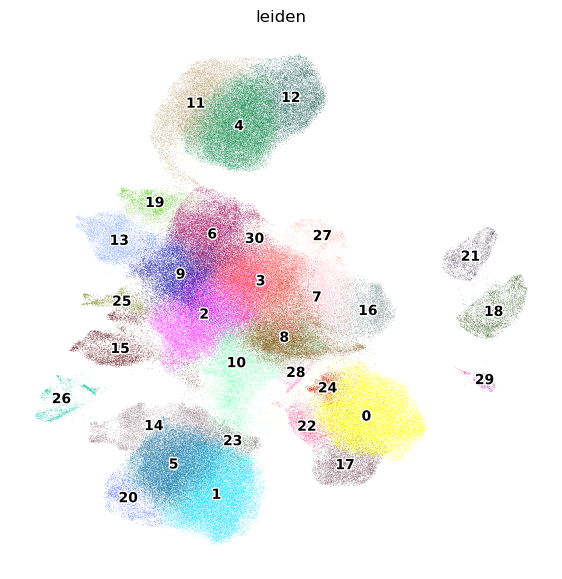

In [5]:
rcParams['figure.figsize'] = (7, 7)

sc.pl.umap(
    adata,
    color = ['leiden'],
    frameon = False,
    legend_loc = 'on data',
    legend_fontoutline = 2,
    # add_outline = True,
    # outline_width = (5, 3)
)

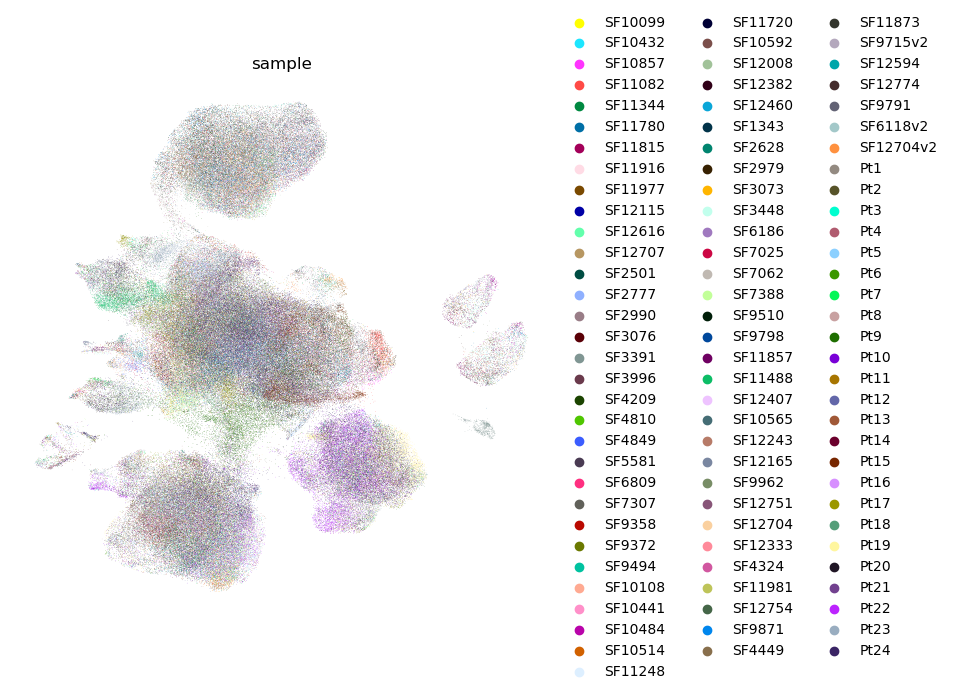

In [6]:
rcParams['figure.figsize'] = (7, 7)

sc.pl.umap(
    adata,
    color = ['sample'],
    frameon = False,
    # legend_loc = 'on data',
    # groups = ['Pt1', 'Pt2', 'Pt3', 'Pt4', 'Pt5', 'Pt6', 'Pt7', 'Pt8', 'Pt9', 'Pt10', 'Pt11', 'Pt12', 'Pt13', 'Pt14', 'Pt15', 'Pt16', 'Pt17', 'Pt18', 'Pt19', 'Pt20', 'Pt21', 'Pt22', 'Pt23', 'Pt24']
)

# Cell type annotation

In [ ]:
for i in range(31):
    print(f'"{i}": "", ')

In [20]:
cell_type = {
    "0": "T cells", 
    "1": "Monocytic cells", 
    "2": "Malignant cells", 
    "3": "Malignant cells", 
    "4": "Oligodendrocytes", 
    "5": "Monocytic cells", 
    "6": "Malignant cells", 
    "7": "Malignant cells", 
    "8": "Malignant cells", 
    "9": "Malignant cells", 
    "10": "Monocytic cells 2", 
    "11": "Oligodendrocytes", 
    "12": "Oligodendrocytes", 
    "13": "Fibroblasts", 
    "14": "Monocytic cells", 
    "15": "Endothelial cells", 
    "16": "Malignant cells", 
    "17": "NK cells", 
    "18": "Neurons", 
    "19": "Endothelial cells", 
    "20": "Monocytic cells", 
    "21": "Neurons", 
    "22": "T cells", 
    "23": "Monocytic cells", 
    "24": "T cells", 
    "25": "Malignant cells", 
    "26": "Etc.", 
    "27": "Malignant cells", 
    "28": "Malignant cells", 
    "29": "Neurons", 
    "30": "Malignant cells", 


}

## Gene expression in feature plot

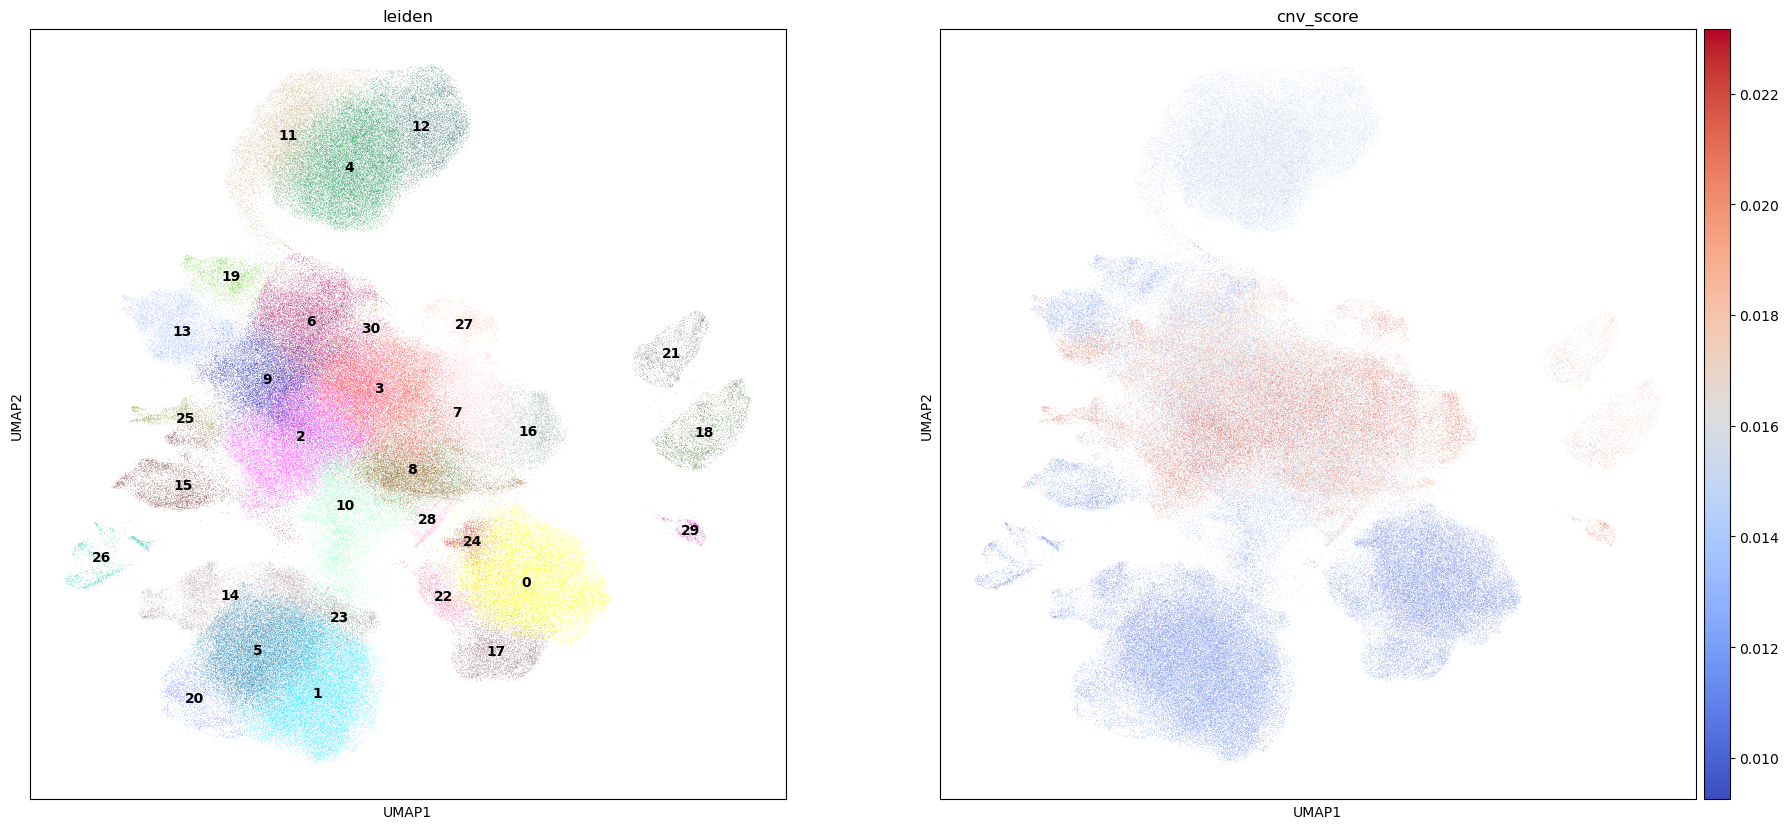

In [19]:
rcParams['figure.figsize'] = (10, 10)

sc.pl.umap(
    adata,
    color = ['leiden', 'cnv_score'],
    # frameon = False,
    layer = 'scvi_normalized',
    color_map = 'coolwarm',
    legend_loc = 'on data',
    # legend_fontoutline = 2,
)

In [ ]:
adata.obs.head()

## Gene expression by violin plot

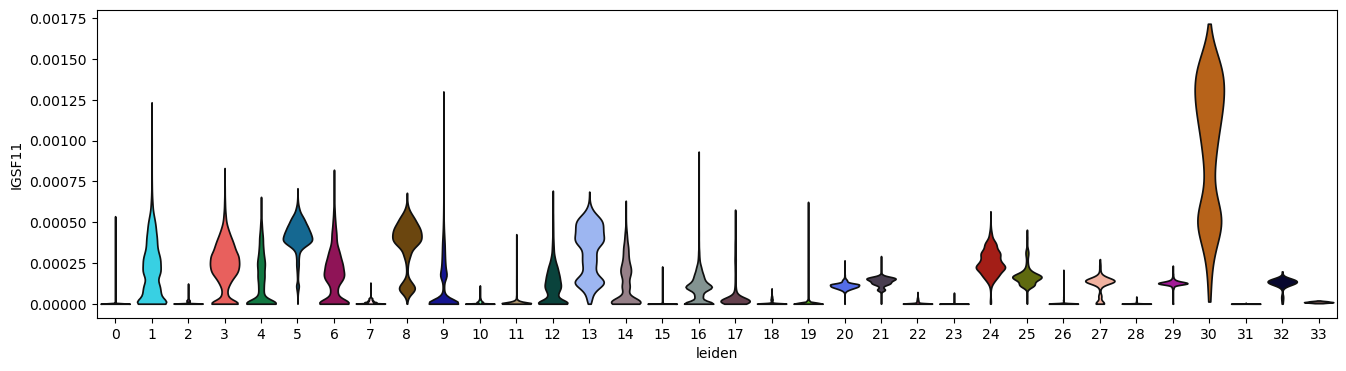

In [38]:
fig, ax = plt.subplots(figsize = (16, 4))

sc.pl.violin(
    adata,
    keys = ['IGSF11'],
    groupby = 'leiden',
    stripplot = False,
    # jitter = 0.4,
    # size = 0.3,
    layer = 'scvi_normalized', use_raw = False,
    ax = ax,
)

## Search cluster by gene name

In [ ]:
# 유전자를 입력하면 높게 발현하는 cluster를 보여줌
markers[markers.names == 'P2ry12']

## Search genes highly expressed in the cluster

In [ ]:
# cluster를 입력하면 높게 발현하는 유전자를 보여줌
for item in markers_scvi[markers_scvi.group1 == '15'][0:10].index:   # 10 개 까지 보여줌
    print(item)

## Cell type 설정

In [21]:
# Assigning cell types
# adata obs에 cell_type column 추가
adata.obs['cell_type'] = adata.obs.leiden.map(cell_type)
adata.obs.head(5)

sample  n_genes  total_counts  pct_counts_mito  \
AAACCCACAGAGTGAC-1  SF10099     1258        2454.0         0.285249   
AAAGGATCAATCGCCG-1  SF10099     1968        3911.0         0.000000   
AAAGGTAAGGATAATC-1  SF10099     2260        4602.0         0.239027   
AAAGTGAAGCGGTATG-1  SF10099     1780        3002.0         0.199867   
AACAACCTCAGCGTCG-1  SF10099     2587        5590.0         0.751342   

                    pct_counts_ribo  _scvi_batch  _scvi_labels leiden  \
AAACCCACAGAGTGAC-1         0.529747            0             0      4   
AAAGGATCAATCGCCG-1         0.332396            0             0      4   
AAAGGTAAGGATAATC-1         0.173837            0             0     16   
AAAGTGAAGCGGTATG-1         0.699534            0             0     16   
AACAACCTCAGCGTCG-1         0.876565            0             0      4   

                    cnv_score         cell_type  
AAACCCACAGAGTGAC-1   0.015237  Oligodendrocytes  
AAAGGATCAATCGCCG-1   0.015237  Oligodendrocytes  
AAAGGTAAGGATAATC-1   0.020285   Malignant cells  
AAAGTGAAGCGGTATG-1   0.020285   Malignant cells  
AACAACCTCAGCGTCG-1   0.015237  Oligodendrocytes

In [22]:
# Monocytic cells 중 P2RY12 발현이 0 초과인 cell들을 Microglia로 변경
monocytic_cells = adata.obs['cell_type'] == 'Monocytic cells'
p2ry12_positive = adata[:, 'P2RY12'].to_df().iloc[:, 0] > 0

# adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['Microglia'])
adata.obs.loc[monocytic_cells & p2ry12_positive, 'cell_type'] = 'Microglia'

## Cell type 확인

### UMAP 확인

In [ ]:
adata

In [25]:
# https://colorswall.com/palette/68
colors = ['#f44336', '#9c27b0', '#3f51b5', '#2196f3', '#009688', '#4caf50', '#ffc107', '#ff9800', '#795548', '#9e9e9e', '#607d8b']
# colors = colors[::-1]
adata.uns['cell_type_colors'] = colors

In [26]:
import pandas as pd

desired_order = ['Malignant cells', 'Monocytic cells', 'Monocytic cells 2', 'Microglia', 'T cells', 'NK cells', 'Oligodendrocytes', 'Endothelial cells', 'Fibroblasts', 'Neurons', 'Etc.']
adata.obs['cell_type'] = pd.Categorical(
    values = adata.obs.cell_type, categories = desired_order, ordered = True
)

In [56]:
adata.obs.head()

sample  n_genes  total_counts  pct_counts_mito  \
AAACCCACAGAGTGAC-1  SF10099     1258        2454.0         0.285249   
AAAGGATCAATCGCCG-1  SF10099     1968        3911.0         0.000000   
AAAGGTAAGGATAATC-1  SF10099     2260        4602.0         0.239027   
AAAGTGAAGCGGTATG-1  SF10099     1780        3002.0         0.199867   
AACAACCTCAGCGTCG-1  SF10099     2587        5590.0         0.751342   

                    pct_counts_ribo  _scvi_batch  _scvi_labels leiden  \
AAACCCACAGAGTGAC-1         0.529747            0             0      8   
AAAGGATCAATCGCCG-1         0.332396            0             0      5   
AAAGGTAAGGATAATC-1         0.173837            0             0     16   
AAAGTGAAGCGGTATG-1         0.699534            0             0     16   
AACAACCTCAGCGTCG-1         0.876565            0             0      8   

                    cnv_score         cell_type  
AAACCCACAGAGTGAC-1   0.013789  Oligodendrocytes  
AAAGGATCAATCGCCG-1   0.013789  Oligodendrocytes  
AAAGGTAAGGATAATC-1   0.018155   Malignant cells  
AAAGTGAAGCGGTATG-1   0.018155   Malignant cells  
AACAACCTCAGCGTCG-1   0.013789  Oligodendrocytes

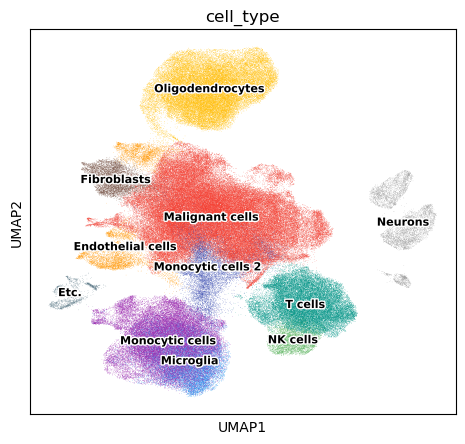

In [28]:
rcParams['figure.figsize'] = (5.5, 5)
sc.pl.umap(
    adata,
    color = ['cell_type'],
    # frameon = False,
    legend_loc = 'on data',
    legend_fontsize = 8,
    legend_fontoutline = 2,
    # palette = sc.pl.palettes.vega_10
    # color_map = 'bwr',
    # groups = ['Microglia']
)

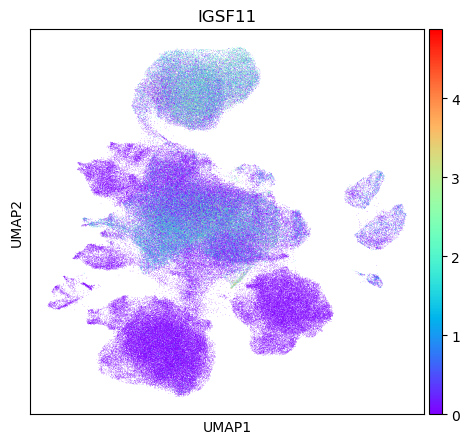

In [34]:
rcParams['figure.figsize'] = (5.6, 5)
sc.pl.umap(
    adata,
    color = ['IGSF11'],
    # frameon = False,
    # legend_loc = 'on data',
    # palette = sc.pl.palettes.vega_10
    # palette = 'bwr',
    
    color_map = 'rainbow'
    # groups = ['Malignant cells']
)

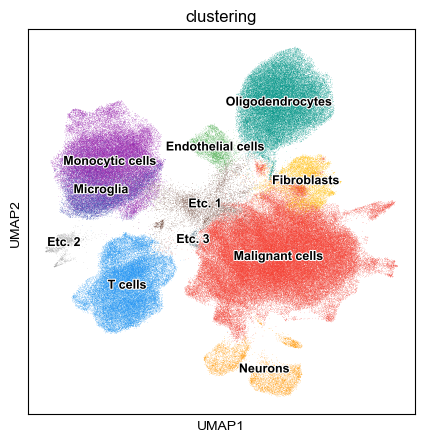

In [208]:
rcParams['figure.figsize'] = (5, 5)
sc.pl.umap(
    adata,
    color = ['cell_type'],
    # add_outline = True,
    # frameon = False,
    legend_loc = 'on data',
    legend_fontsize = 9,
    legend_fontoutline = 1.5,
    title = 'clustering'
    
)

### Violin plot gene expression 확인

In [ ]:
fig, ax = plt.subplots(figsize = (7, 4))
gene = 'IGSF8'

sc.pl.violin(
    adata,
    keys = gene,
    groupby = 'cell_type',
    stripplot = False,
    # jitter = 0.4,
    # size = 0.3,
    layer = 'scvi_normalized', use_raw = False,
    ax = ax,
    show = False,
    
)

plt.rcParams['font.family'] = 'Arial'
plt.xticks(rotation = 45, rotation_mode = 'anchor', ha = 'right', fontsize = 12)   # x 축 레이블 회전
plt.yticks(fontsize = 12)
plt.title(gene, fontweight = 'bold', fontsize = 15)
# plt.ylabel('VSIR', fontsize = 12, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('')

plt.show()

### Dot plot

In [111]:
marker_genes_dict = {
    'Malignant cells': ['EGFR'],
    'Monocytic cells': ['HLA-DRA', 'C1QA'],
    'Microglia': ['P2RY12', 'TMEM119'],
    'T cells': ['CD3E'],
    'Oligodendrocyte': ['MBP', 'MAG'],
    'Endothelial cells': ['ESAM'],
    'Fibroblasts': ['FN1'],
    'Neurons': ['SNAP25', 'SYP'],
}

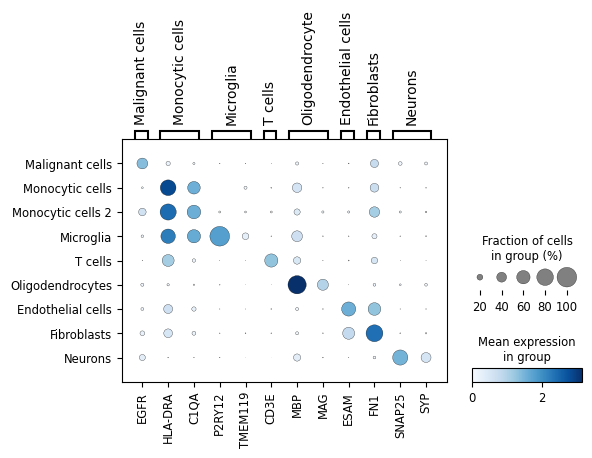

In [116]:
# sc.tl.dendrogram(adata, groupby = 'cell_type')    # dot plot 한번 그린 후 cell type annotation 바꾸면 이거 돌려줘야 함

excluded_cell_types = ['Etc. 1', 'Etc. 2', 'Etc. 3']
temp_adata_subset = adata[~adata.obs['cell_type'].isin(excluded_cell_types), :]
sc.pl.dotplot(
    temp_adata_subset,
    marker_genes_dict,
    groupby = 'cell_type',
    # dendrogram = True,
    # var_group_rotation = 45,
    cmap = 'Blues',
)
del temp_adata_subset, excluded_cell_types

In [128]:
adata

AnnData object with n_obs × n_vars = 278304 × 34234
    obs: 'sample', 'n_genes', 'total_counts', 'pct_counts_mito', 'pct_counts_ribo', '_scvi_batch', '_scvi_labels', 'leiden', 'cnv_score', 'cell_type'
    var: 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'sample_colors', 'umap', 'rank_genes_groups', 'cell_type_colors', 'dendrogram_cell_type'
    obsm: 'X_pca', 'X_scVI', 'X_umap', '_scvi_extra_continuous_covs'
    varm: 'PCs'
    layers: 'counts', 'scvi_normalized'
    obsp: 'connectivities', 'distances'

# Save

In [42]:
# adata.uns['scvi_markers'] = markers_scvi
adata.uns['markers'] = markers

adata.write_h5ad(folder_path + "adata_annotated.h5ad")
# 3,446,216 kb

---
# 그래프 그리기

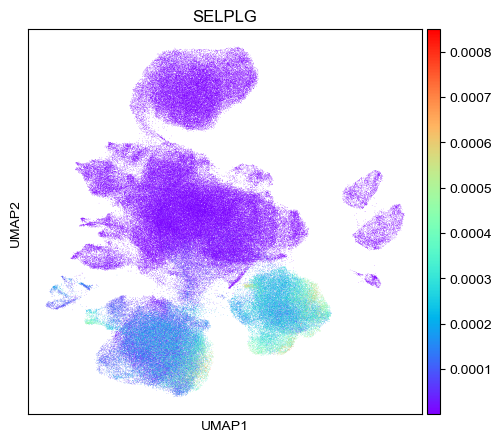

In [40]:
rcParams['figure.figsize'] = (5.6, 5)
sc.pl.umap(
    adata,
    color = ['SELPLG'],
    # add_outline = True,
    # frameon = False,
    legend_loc = 'on data',
    layer = 'scvi_normalized',
    color_map = 'rainbow',
    # s = 1
    # title = 'clustering'
    
)


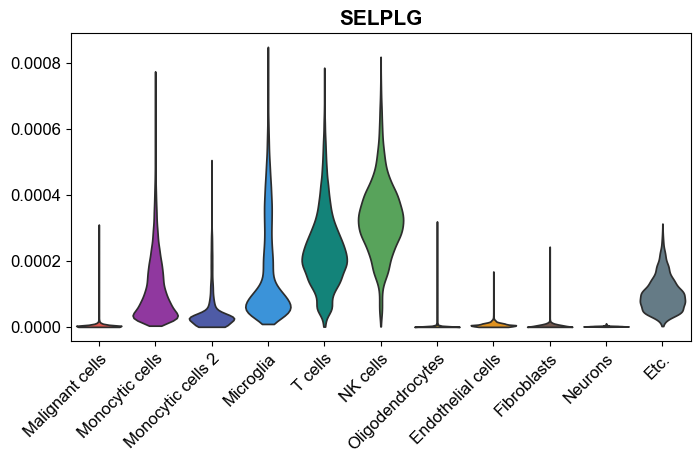

In [41]:
fig, ax = plt.subplots(figsize = (8, 4))
gene = 'SELPLG'

sc.pl.violin(
    adata,
    keys = gene,
    groupby = 'cell_type',
    stripplot = False,
    # jitter = 0.4,
    # size = 0.3,
    layer = 'scvi_normalized', use_raw = False,
    ax = ax,
    show = False,
    
)

plt.rcParams['font.family'] = 'Arial'
plt.xticks(rotation = 45, rotation_mode = 'anchor', ha = 'right', fontsize = 12)   # x 축 레이블 회전
plt.yticks(fontsize = 12)
plt.title(gene, fontweight = 'bold', fontsize = 15)
# plt.ylabel('VSIR', fontsize = 12, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('')

plt.show()